In [29]:
import torch
import src.rnn as rnn
from torch import nn
import torch.optim as optim
import importlib

importlib.reload(rnn)
# Hyperparameters
input_length = 10
output_length = 10
batch_size = 32
learning_rate = 0.001
num_epochs = 100

# Generate some synthetic 2D data for demonstration purposes
t = torch.linspace(0, 100, steps=1000)
x_data = torch.sin(t)
y_data = torch.cos(t)
data = torch.stack((x_data, y_data), dim=1)  # Combine into 2D points

# Create dataset and dataloader
dataset = rnn.TimeSeriesDataset2D(data, input_length, output_length)
dataloader = rnn.DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Initialize model, loss function, and optimizer
model = rnn.LinearRegressionModel2D(input_length, output_length)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
for epoch in range(num_epochs):
    for inputs, targets in dataloader:
        optimizer.zero_grad()
        print(inputs.shape)
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Training complete.")

# Example of using the model to predict
test_input = data[:input_length].unsqueeze(0)  # Add batch dimension
predicted_output = model(test_input).detach().numpy()
print("Predicted output:", predicted_output)

torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([20, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 10, 2])
torch.Size([32, 

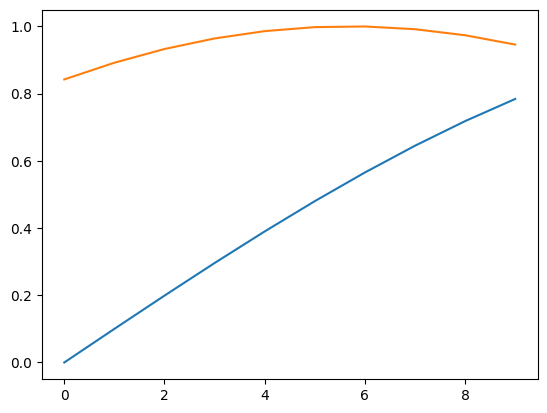

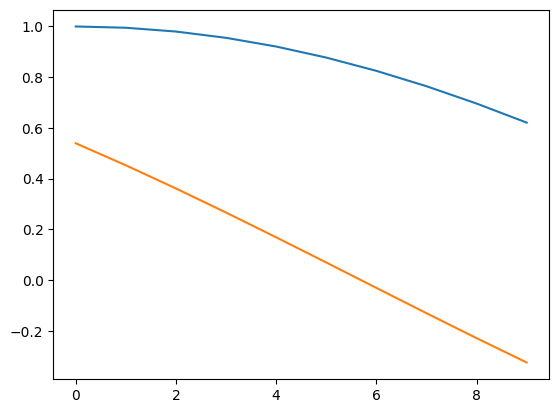

In [21]:
import matplotlib.pyplot as plt
import numpy as np
# print(data[:, 0])
# plt.plot(np.arange(10), x_data)
# plt.plot(data[:, 0])
plt.figure()
plt.plot(test_input[:, :, 0][0])
plt.plot(predicted_output[:, :, 0][0])

plt.figure()
plt.plot(test_input[:, :, 1][0])
plt.plot(predicted_output[:, :, 1][0])